### 论文图片只能用黑白的，我之前存的全是彩色的，好烦！还好把结果数据都保存了下来，在这里将其转换。(黑白图好丑啊)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


### 经纬度数据分布图

In [14]:
def distribution_scatter(df):
    '''
        传入df数据结构，绘制经纬度散点图
    '''
    plt.figure(1 , figsize = (15 , 6))
    plt.scatter(x = 'latitude' , y = 'longitude' , color = 'k',data = df ,
                    s = 80 , alpha = 0.5 )
    plt.xlabel('纬度' ), plt.ylabel('经度') 
    plt.title('经纬度分布图')
    plt.savefig('../GIS_LSH_VE_CF/bw_picture/location.jpg',dpi=500)
    plt.show()


In [9]:
import pandas as pd
data = pd.read_table("data/data.csv",sep=",",names=['latitude','longitude'])

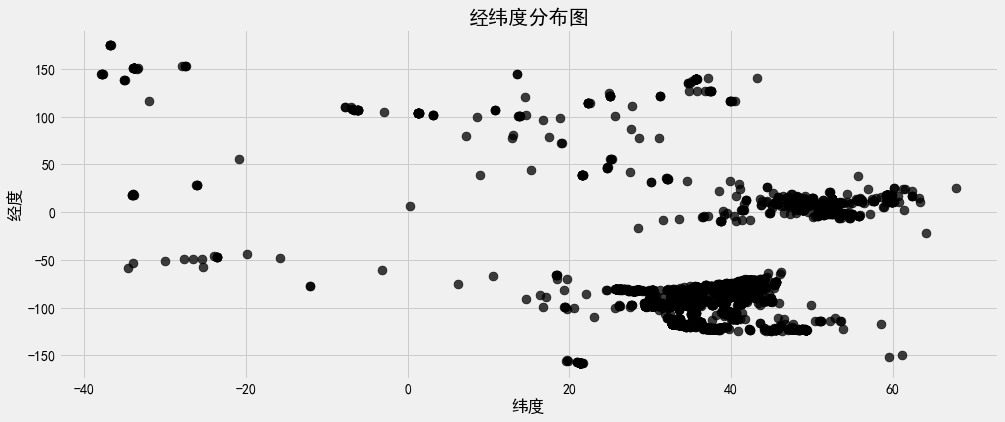

In [15]:
plt.style.use('fivethirtyeight') 
distribution_scatter(data)

### cf图片

In [2]:
data_item = [2000,4000,6000,8000,10000]
bits_dic =  [2.6950108936050357, 1.661078180708751, 1.305728788478062, 0.959064422232398, 0.78577004196142]
times =  [381.67915081977844, 757.9141619205475, 1146.3556566238403, 1511.9732131958008, 1920.1025586128235]


各个算法的误差为:[2.6950108936050357, 1.661078180708751, 1.305728788478062, 0.959064422232398, 0.78577004196142]
各个所用的时间为[381.67915081977844, 757.9141619205475, 1146.3556566238403, 1511.9732131958008, 1920.1025586128235]


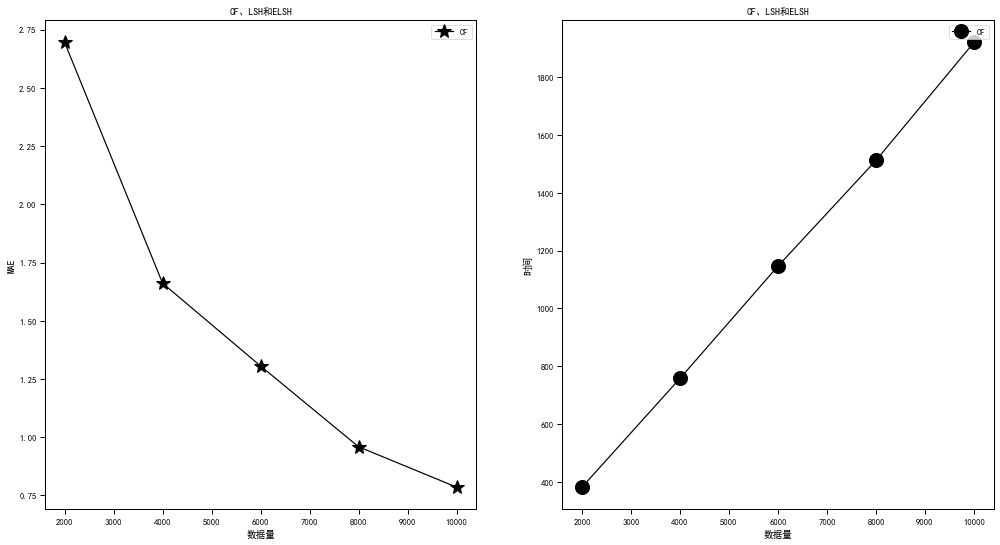

In [9]:
leg = []
leg.append("CF"),leg.append("LSH"),leg.append("ELSH ")
print("各个算法的误差为:{0}\n各个所用的时间为{1}".format(bits_dic,times))

style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (17 , 9) )
plt.subplot(121)
plt.plot(data_item,bits_dic,color = 'k',marker=style[0],markersize=14)
plt.xlabel("数据量"),plt.ylabel("MAE"),plt.title("CF、LSH和ELSH"),plt.legend(leg)

plt.subplot(122)
plt.plot(data_item,times,color = 'k',marker=style[1],markersize=14)
plt.xlabel("数据量"),plt.ylabel("时间"),plt.title("CF、LSH和ELSH"),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//CF_LSH_ELSH1.jpg',dpi=500)
plt.show()

### num和nbits变化图

In [2]:
nbits,num_lis,d = 10,[1,2,3,4,5,6,7,8,9,10],2
mae = [3.205828649416741, 3.0417506977304427, 3.0662281158456284, 3.004025663877269, 3.0408865711286186, 3.023219165373059, 
3.0133234469131263, 3.014468015668421, 2.9718681478517492, 2.9811172995256565] 
times = [52.69600462913513, 107.64199829101562, 130.47101545333862, 189.38578629493713, 321.3763370513916, 344.2920913696289, 
535.0574066638947, 599.1915102005005, 488.3573122024536, 686.4112279415131]  

mae: [3.205828649416741, 3.0417506977304427, 3.0662281158456284, 3.004025663877269, 3.0408865711286186, 3.023219165373059, 3.0133234469131263, 3.014468015668421, 2.9718681478517492, 2.9811172995256565]
times: [52.69600462913513, 107.64199829101562, 130.47101545333862, 189.38578629493713, 321.3763370513916, 344.2920913696289, 535.0574066638947, 599.1915102005005, 488.3573122024536, 686.4112279415131]


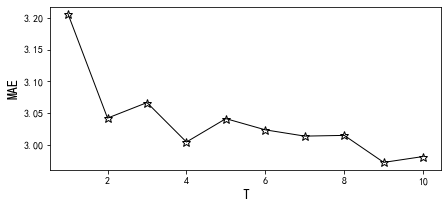

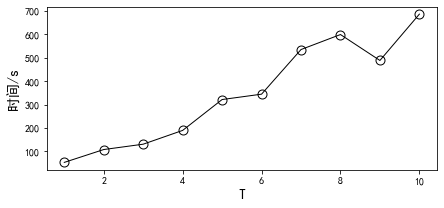

In [8]:

print("mae:",mae)
print("times:",times)
# data.to_csv("../GIS_LSH_VE_CF/data/predict_data.csv")
style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )

# plt.subplot(121)
plt.plot(num_lis,mae,color = 'k',marker=style[0],markersize=9,linewidth=1,markerfacecolor='none')
plt.xlabel("T", fontsize=14)
plt.ylabel("MAE", fontsize=14)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_num_time_MAE1.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
# plt.title("LSH误差随b的变化")
# plt.subplot(122)
plt.figure(2 , figsize = (7 , 3) )
plt.plot(num_lis,times,color = 'k',marker=style[1],markersize=9,linewidth=1, markerfacecolor='none')
plt.xlabel("T",fontsize=14)
plt.ylabel("时间/s",fontsize=14)
# plt.title("LSH时间随tables的变化")
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_num_time_MAE2.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
plt.show()

In [21]:
index = 0
proportion = [x for x in mae]
for i in range(len(mae)):
    proportion[i] = times[i]/mae[i]
proportion

[16.43756120238132,
 35.38817246637968,
 42.55098137646432,
 63.043997450573904,
 105.68507885255103,
 113.88261073263737,
 177.56388123950381,
 198.77189178523665,
 164.3267089609842,
 230.25300884696222]

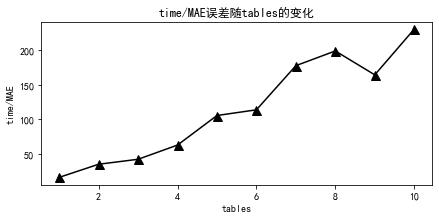

In [23]:
plt.figure(1 , figsize = (7 , 3) )

plt.plot(num_lis,proportion,color = 'k',marker="^",markersize=9)
plt.xlabel("tables")
plt.ylabel("time/MAE")
plt.title("time/MAE误差随tables的变化")
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_MAE_time.jpg',dpi=500)
plt.show()

In [1]:
nbits_lis,num_lis,d = [10,20,30,40,50,60,70,80,90,100],2,2
mae = [3.034338095194681, 3.1281544567054787, 3.1421490831077676, 3.0703655525266123, 3.117964350130256, 3.138855373484442, 3.2067813611334284, 3.1209127749377137, 3.147774606981567, 3.3131245210357205] 
times = [176.20650219917297, 97.28599977493286, 71.04850339889526, 75.33549904823303, 66.9540011882782, 75.00849461555481, 55.19348454475403, 50.044496297836304, 72.30998587608337, 62.11602735519409] 

mae: [3.034338095194681, 3.1281544567054786, 3.1421490831077676, 3.0703655525266123, 3.117964350130256, 3.138855373484442, 3.2067813611334284, 3.1209127749377137, 3.147774606981567, 3.3131245210357205]
times: [176.20650219917297, 97.28599977493286, 71.04850339889526, 75.33549904823303, 66.9540011882782, 75.00849461555481, 55.19348454475403, 50.044496297836304, 72.30998587608337, 62.11602735519409]


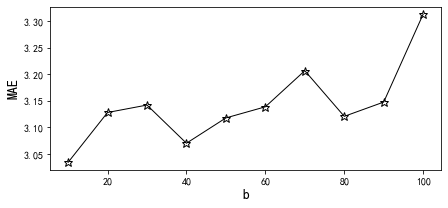

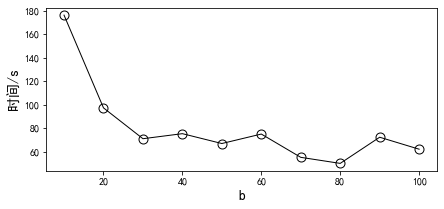

In [4]:


print("mae:",mae)
print("times:",times)
# data.to_csv("../GIS_LSH_VE_CF/data/predict_data.csv")
style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )

# plt.subplot(121)
plt.plot(nbits_lis,mae,color = 'k',marker=style[0],linewidth=1,markersize=9,markerfacecolor='none')
plt.xlabel("b", fontsize=14)
plt.ylabel("MAE", fontsize=14)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_nbits_time_MAE1.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
#plt.title("LSH误差随buckets的变化")
# plt.subplot(122)
plt.figure(2 , figsize = (7 , 3) )
plt.plot(nbits_lis,times,color = 'k',marker=style[1],linewidth=1,markersize=9,markerfacecolor='none')
plt.xlabel("b",fontsize=14)
plt.ylabel("时间/s",fontsize=14)
#plt.title("LSH时间随buckets的变化")
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_nbits_time_MAE2.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
plt.show()


### MAE/time权重变化

In [25]:
index = 0
proportion = [x for x in mae]
for i in range(len(mae)):
    proportion[i] = times[i]/mae[i]
proportion

[58.07082028143857,
 31.100126647004796,
 22.61143616031871,
 24.536328902673898,
 21.47362627333476,
 23.896766716042706,
 17.21148975533712,
 16.03521146111976,
 22.971780036507173,
 18.74847352123545]

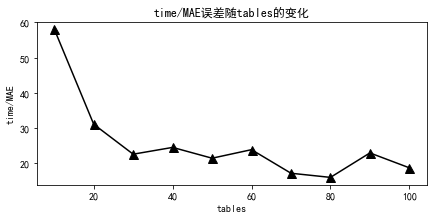

In [27]:
plt.figure(1 , figsize = (7 , 3) )

plt.plot(nbits_lis,proportion,color = 'k',marker="^",markersize=9)
plt.xlabel("tables")
plt.ylabel("time/MAE")
plt.title("time/MAE误差随tables的变化")
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture/LSH_MAE_time.jpg',dpi=500)
plt.show()

### CF和LSH_VE的对比

In [5]:
data_item = [2000,4000,6000,8000,10000]
bits_dic = {0: [2.6950108936050357, 1.661078180708751, 1.305728788478062, 0.959064422232398, 0.78577004196142], 1: [2.656784127948325, 1.6266065549461248, 1.286687804508825, 1.090475350084425, 0.8677701116945999], 2: [2.6886133612230747, 1.64250927387285, 1.302546027911725, 1.106327935520575, 0.883603570520125]}
times = {0: [379.32889914512634, 764.2643761634827, 1175.7989473342896, 1559.0139877796173, 1934.7203288078308], 1: [72.31787586212158, 135.21740293502808, 214.49260234832764, 293.841189622879, 365.40583300590515], 2: [103.57593989372253, 194.49724173545837, 307.56843185424805, 520.6254773139954, 685.0465750694275]}

各个算法的误差为:{0: [2.6950108936050357, 1.661078180708751, 1.305728788478062, 0.959064422232398, 0.78577004196142], 1: [2.656784127948325, 1.6266065549461248, 1.286687804508825, 1.090475350084425, 0.8677701116945999], 2: [2.6886133612230747, 1.64250927387285, 1.302546027911725, 1.106327935520575, 0.883603570520125]}
各个所用的时间为{0: [379.32889914512634, 764.2643761634827, 1175.7989473342896, 1559.0139877796173, 1934.7203288078308], 1: [72.31787586212158, 135.21740293502808, 214.49260234832764, 293.841189622879, 365.40583300590515], 2: [103.57593989372253, 194.49724173545837, 307.56843185424805, 520.6254773139954, 685.0465750694275]}


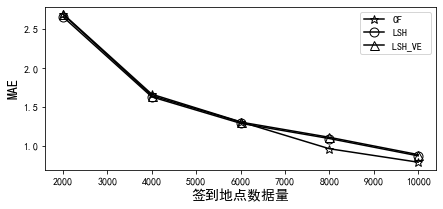

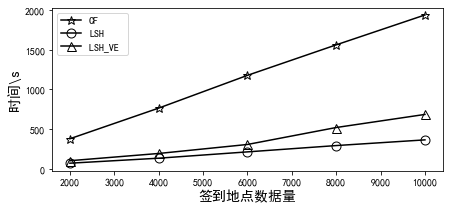

In [7]:
leg = []
leg.append("CF"),leg.append("LSH"),leg.append("LSH_VE ")
print("各个算法的误差为:{0}\n各个所用的时间为{1}".format(bits_dic,times))

style = ["*","o","^","s","X","<",">","p","h","1","2"]
plt.figure(1 , figsize = (7 , 3) )
for i in range(3):
    plt.plot(data_item,bits_dic[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("签到地点数据量",fontsize=14),plt.ylabel("MAE",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//CF_LSH_ELSH_MAE.jpg', bbox_inches='tight', pad_inches=0,dpi=500)

plt.figure(2 , figsize = (7 , 3) )
for i in range(3):
    plt.plot(data_item,times[i],color='k',marker=style[i],markersize=9,markerfacecolor='none')
plt.xlabel("签到地点数据量",fontsize=14),plt.ylabel("时间\s",fontsize=14),plt.legend(leg)
fig=plt.gcf()
fig.savefig('../GIS_LSH_VE_CF/bw_picture//CF_LSH_ELSH_time.jpg', bbox_inches='tight', pad_inches=0,dpi=500)
plt.show()

### MAE、time和proportion保留小数点后两位，做表格

In [ ]:
def score():
    

In [1]:
nbits_lis,num_lis,d = [10,20,30,40,50,60,70,80,90,100],2,2
mae = [3.034338095194681, 3.1281544567054787, 3.1421490831077676, 3.0703655525266123, 3.117964350130256, 3.138855373484442, 3.2067813611334284, 3.1209127749377137, 3.147774606981567, 3.3131245210357205] 
times = [176.20650219917297, 97.28599977493286, 71.04850339889526, 75.33549904823303, 66.9540011882782, 75.00849461555481, 55.19348454475403, 50.044496297836304, 72.30998587608337, 62.11602735519409] 
tem_mae = [round(x,2) for x in mae]
tem_times = [round(x,2) for x in times]
proportion = [round(tem_times[i]/tem_mae[i],2) for i in range(len(mae))]
print(tem_mae)
print(tem_times)
print(proportion)

[3.03, 3.13, 3.14, 3.07, 3.12, 3.14, 3.21, 3.12, 3.15, 3.31]
[176.21, 97.29, 71.05, 75.34, 66.95, 75.01, 55.19, 50.04, 72.31, 62.12]
[58.16, 31.08, 22.63, 24.54, 21.46, 23.89, 17.19, 16.04, 22.96, 18.77]


In [2]:
nbits,num_lis,d = 10,[1,2,3,4,5,6,7,8,9,10],2
mae = [3.205828649416741, 3.0417506977304427, 3.0662281158456284, 3.004025663877269, 3.0408865711286186, 3.023219165373059, 
3.0133234469131263, 3.014468015668421, 2.9718681478517492, 2.9811172995256565] 
times = [52.69600462913513, 107.64199829101562, 130.47101545333862, 189.38578629493713, 321.3763370513916, 344.2920913696289, 
535.0574066638947, 599.1915102005005, 488.3573122024536, 686.4112279415131]  
tem_mae = [round(x,2) for x in mae]
tem_times = [round(x,2) for x in times]
proportion = [round(tem_times[i]/tem_mae[i],2) for i in range(len(mae))]
print(tem_mae)
print(tem_times)
print(proportion)

[3.21, 3.04, 3.07, 3.0, 3.04, 3.02, 3.01, 3.01, 2.97, 2.98]
[52.7, 107.64, 130.47, 189.39, 321.38, 344.29, 535.06, 599.19, 488.36, 686.41]
[16.42, 35.41, 42.5, 63.13, 105.72, 114.0, 177.76, 199.07, 164.43, 230.34]


In [1]:
def score(x,y):
    return x*(y/(x+y))+y*(x/(x+y))

In [2]:
# 按比重进行划分
nbits,num_lis,d = 10,[1,2,3,4,5,6,7,8,9,10],2
mae = [3.205828649416741, 3.0417506977304427, 3.0662281158456284, 3.004025663877269, 3.0408865711286186, 3.023219165373059, 
3.0133234469131263, 3.014468015668421, 2.9718681478517492, 2.9811172995256565] 
times = [52.69600462913513, 107.64199829101562, 130.47101545333862, 189.38578629493713, 321.3763370513916, 344.2920913696289, 
535.0574066638947, 599.1915102005005, 488.3573122024536, 686.4112279415131]  
tem_mae = [round(x,2) for x in mae]
tem_times = [round(x,2) for x in times]
proportion = [round(score(tem_times[i],tem_mae[i]),2) for i in range(len(mae))]
print(tem_mae)
print(tem_times)
print(proportion)

[3.21, 3.04, 3.07, 3.0, 3.04, 3.02, 3.01, 3.01, 2.97, 2.98]
[52.7, 107.64, 130.47, 189.39, 321.38, 344.29, 535.06, 599.19, 488.36, 686.41]
[6.05, 5.91, 6.0, 5.91, 6.02, 5.99, 5.99, 5.99, 5.9, 5.93]


In [7]:
x = 535.06
y = 3.01
x*(y/(x+y))+y*(x/(x+y))

5.98632371252811

In [5]:
nbits_lis,num_lis,d = [10,20,30,40,50,60,70,80,90,100],2,2
mae = [3.034338095194681, 3.1281544567054787, 3.1421490831077676, 3.0703655525266123, 3.117964350130256, 3.138855373484442, 3.2067813611334284, 3.1209127749377137, 3.147774606981567, 3.3131245210357205] 
times = [176.20650219917297, 97.28599977493286, 71.04850339889526, 75.33549904823303, 66.9540011882782, 75.00849461555481, 55.19348454475403, 50.044496297836304, 72.30998587608337, 62.11602735519409] 
tem_mae = [round(x,2) for x in mae]
tem_times = [round(x,2) for x in times]
proportion = [round(score(tem_times[i],tem_mae[i]),2) for i in range(len(mae))]
print(tem_mae)
print(tem_times)
print(proportion)

[3.03, 3.13, 3.14, 3.07, 3.12, 3.14, 3.21, 3.12, 3.15, 3.31]
[176.21, 97.29, 71.05, 75.34, 66.95, 75.01, 55.19, 50.04, 72.31, 60.12]
[5.96, 6.06, 6.01, 5.9, 5.96, 6.03, 6.07, 5.87, 6.04, 6.27]
